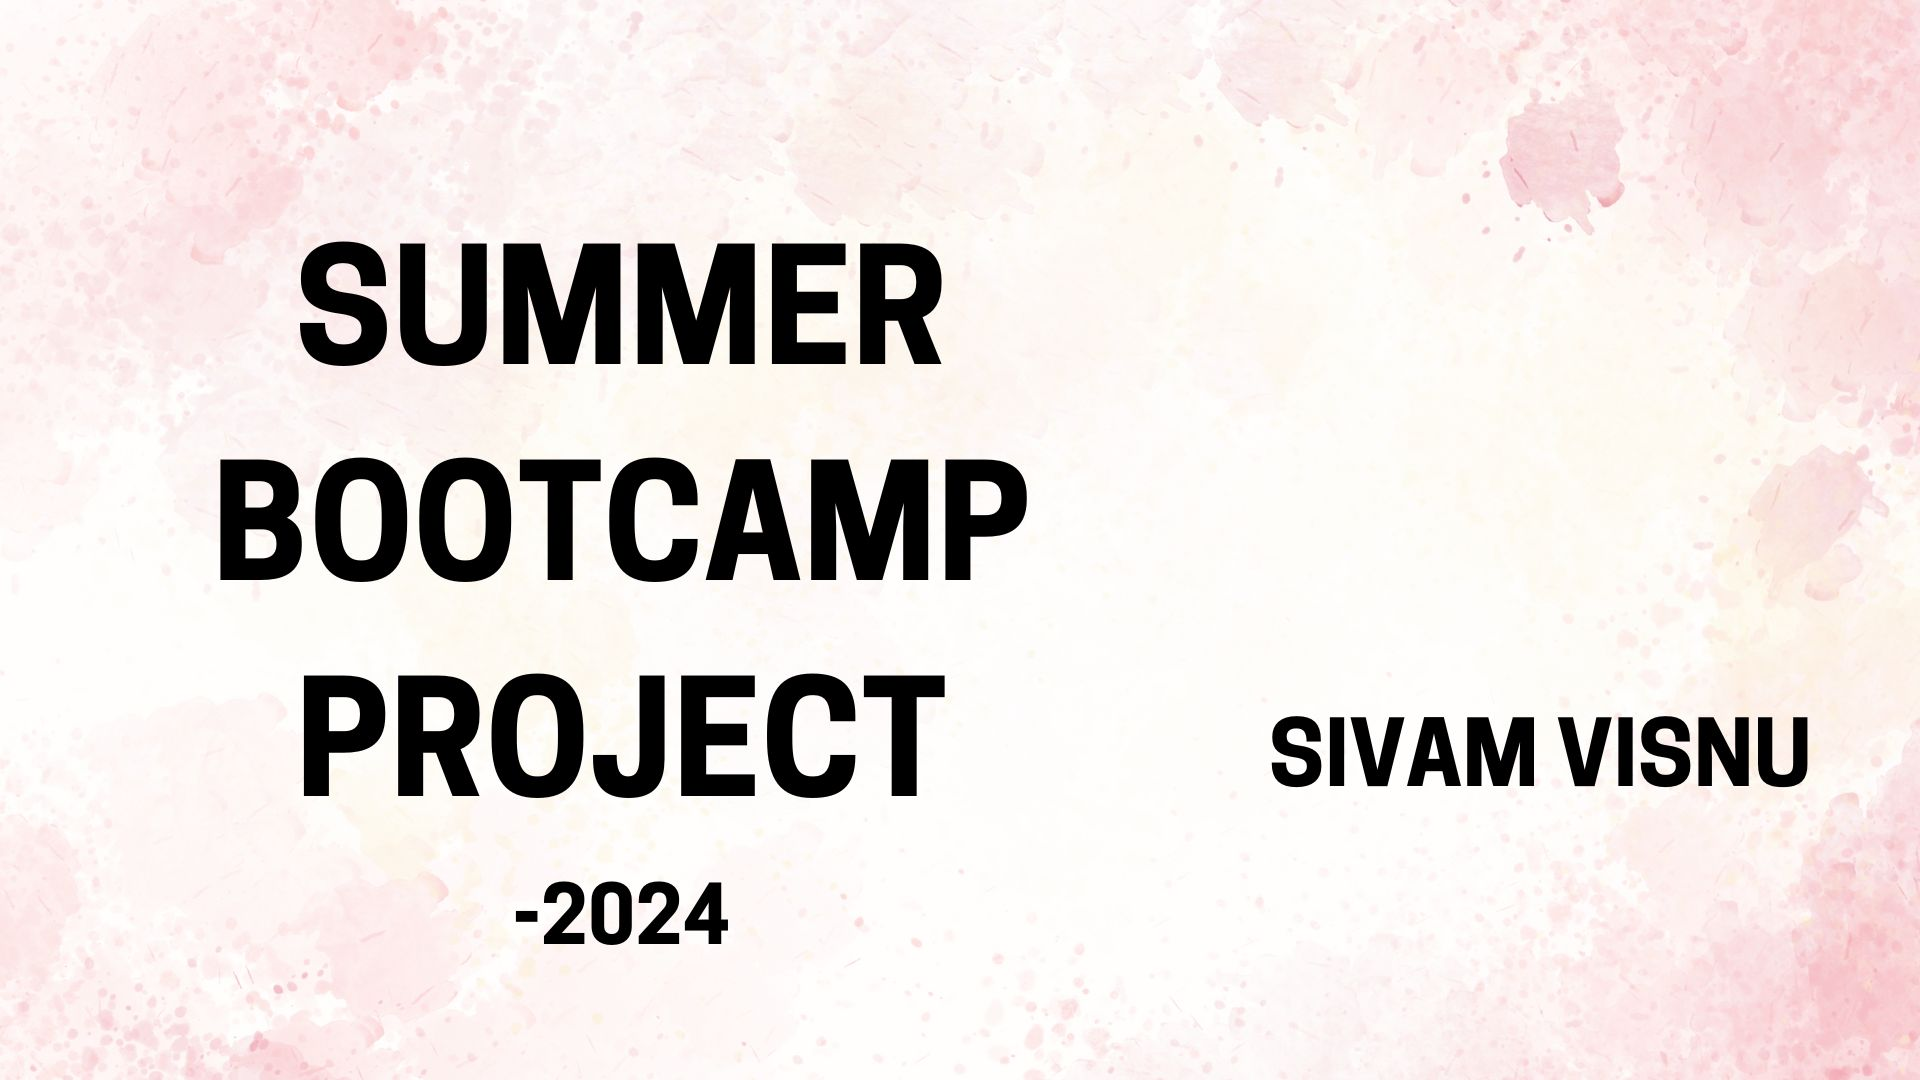

# INDEX

# LIST  OF TABLES

# LIST OF FIGURES

# PROBLEM STATEMENT
A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of productsin 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

# Wholesale Data Analysis

## Data Dictionary
* 1.Buyer/Spender- ID's of customers
* 2.Region- Region of the distribution
* 3.Fresh- spending on Fresh Vegetables
* 4.Milk- spending on milk
* 5.Grocery- spending on grocery
* 6.Frozen- spending on frozen food
* 7.Detergents_paper- spending on detergents and toilet paper
* 8.Delicatessen- spending on instant foods

## Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Dataset

In [3]:
df = pd.read_csv(r"C:\Users\Sivam Visnu\Desktop\BOOTCAMP\4-Wholesale Customer_New.csv");

## BASIC STEPS

## 1-Display the top 5 rows.

In [4]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214.0,2674.0,1338.0
1,2,Retail,Other,7057,9810,9568,1762.0,3293.0,1776.0
2,3,Retail,Other,?,8808,7684,2405.0,3516.0,7844.0
3,4,Hotel,Other,13265,1196,4221,6404.0,507.0,1788.0
4,5,Retail,Other,22615,5410,7198,3915.0,1777.0,5185.0


## 2-Display the last 5 rows

In [5]:
df.tail()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
435,436,Hotel,Other,29703,12051,16027,13135.0,182.0,2204.0
436,437,Hotel,Other,39228,1431,764,4510.0,93.0,2346.0
437,438,Retail,Other,14531,15488,30243,437.0,14841.0,1867.0
438,439,Hotel,Other,10290,1981,2232,1038.0,168.0,2125.0
439,440,Hotel,Other,2787,1698,2510,65.0,477.0,52.0


## 3-Check the shape of dataset.

In [6]:
df.shape

(440, 9)

## 4-Check the datatypes of each feature.

In [7]:
df.dtypes

Buyer/Spender         int64
Channel              object
Region               object
Fresh                object
Milk                  int64
Grocery               int64
Frozen              float64
Detergents_Paper    float64
Delicatessen        float64
dtype: object

## 5-Check the Statistical summary.

In [8]:
df.describe()

,Buyer/Spender,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,437.000000,439.000000,438.000000
mean,220.500000,6035.779545,7951.277273,3085.638444,3773.747153,1531.057078
std,127.161315,8964.929649,9503.162829,4867.744145,19364.886053,2825.044262
min,1.000000,1.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,1525.250000,2153.000000,744.000000,256.500000,411.250000
50%,220.500000,3641.000000,4755.500000,1535.000000,813.000000,971.000000
75%,330.250000,7217.500000,10655.750000,3570.000000,3956.000000,1822.750000
max,440.000000,112400.000000,92780.000000,60869.000000,396100.000000,47943.000000


## 6-Check the null values

In [9]:
df.isnull().sum()

Buyer/Spender       0
Channel             3
Region              6
Fresh               0
Milk                0
Grocery             0
Frozen              3
Detergents_Paper    1
Delicatessen        2
dtype: int64

### null value imputation

In [10]:
df.isnull().sum()/len(df)*100

Buyer/Spender       0.000000
Channel             0.681818
Region              1.363636
Fresh               0.000000
Milk                0.000000
Grocery             0.000000
Frozen              0.681818
Detergents_Paper    0.227273
Delicatessen        0.454545
dtype: float64

## 7-Check the duplicate values

In [11]:
df.duplicated().sum()

0

## 8-Check the anomalies or wrong entries.

In [12]:
df["Region"].unique()

array(['Other', 'Lisbon', nan, 'Oporto'], dtype=object)

In [13]:
df["Region"].value_counts()

Region
Other     316
Lisbon     75
Oporto     43
Name: count, dtype: int64

In [14]:
df[df["Region"] == '?']

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


In [15]:
df[df["Channel"] == '?']

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


## 9-Check the outliers and their authenticity.

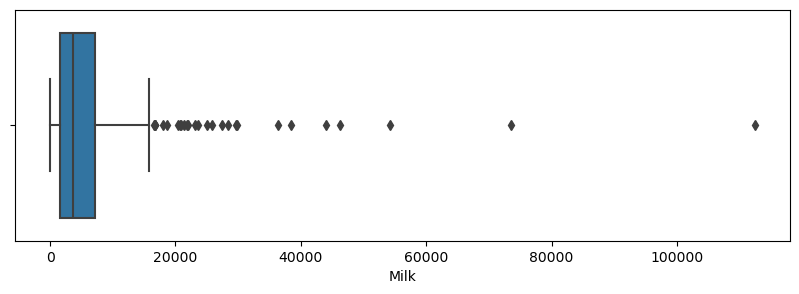

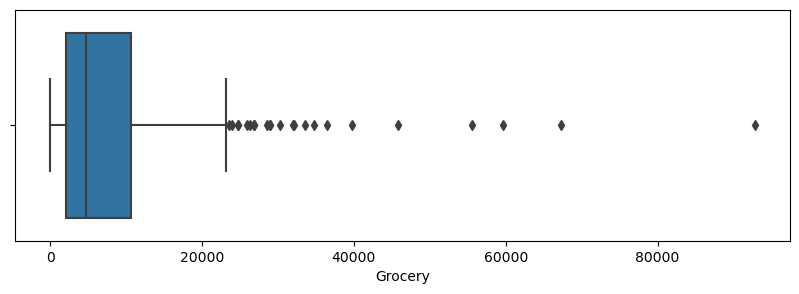

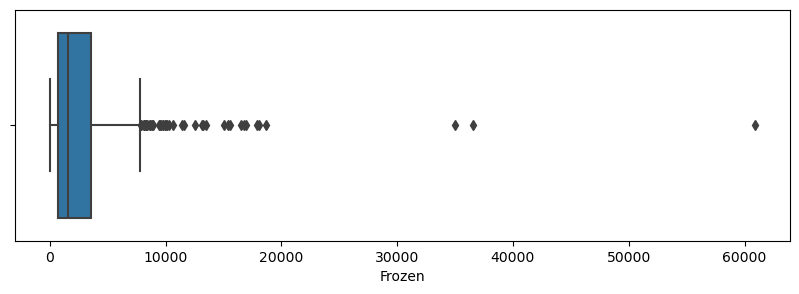

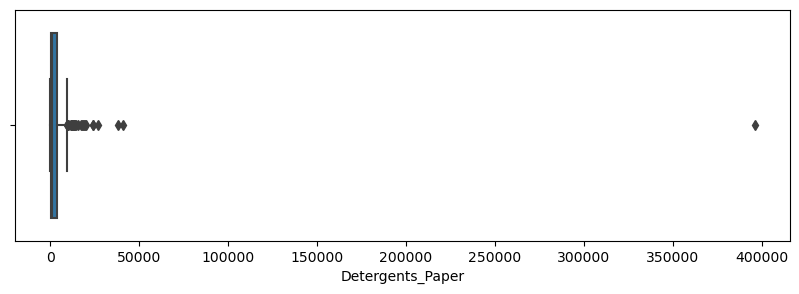

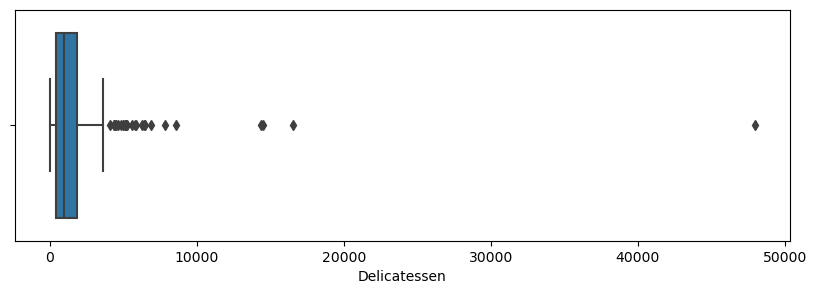

In [16]:
for i in ["Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicatessen"]:
    plt.figure(figsize=(10,3))
    sns.boxplot(data=df, x=i)
    plt.show()

## 10-Do the necessary data cleaning steps like dropping duplicates, unnecessary columns, null value imputation, outliers treatment etc.

In [17]:
def remove_outlier(col):
    sorted(col)
    q1,q3 = col.quantile([0.25,0.75])
    iqr = q3-q1
    lower_range = q1-(1.5*iqr)
    upper_range = q3+(1.5*iqr)
    return lower_range, upper_range

In [18]:
ll,ul = remove_outlier(df['Milk'])

In [19]:
df[df['Milk'] > ul]

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
11,12,Retail,Other,13146,112400,4523,1420.0,549.0,497.0
23,24,Retail,Other,26373,36423,22019,5154.0,4337.0,16523.0
28,29,Retail,Other,4113,20484,25957,1158.0,8604.0,5206.0
45,46,Retail,Other,5181,22044,21531,1740.0,7353.0,4985.0
47,48,Retail,Other,44466,54259,55571,7782.0,24171.0,6465.0
49,50,Retail,Other,4967,21412,28921,1798.0,13583.0,1163.0
56,57,Retail,Other,4098,29892,26866,2616.0,17740.0,1340.0
61,62,Retail,Other,35942,38369,59598,3254.0,26701.0,2017.0
65,66,Retail,Other,85,20959,45828,36.0,24231.0,1423.0
85,86,Retail,Other,16117,46197,92780,1026.0,40827.0,2944.0


In [20]:
df[df['Milk'] < ll]

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


In [21]:
median1 = df["Milk"].median()
median2 = df["Grocery"].median()
median3 = df["Frozen"].median()
median4 = df["Detergents_Paper"].median()
median5 = df["Delicatessen"].median()

df["Milk"].replace(np.nan,median1,inplace=True)
df["Grocery"].replace(np.nan,median2,inplace=True)
df["Frozen"].replace(np.nan,median3,inplace=True)
df["Detergents_Paper"].replace(np.nan,median4,inplace=True)
df["Delicatessen"].replace(np.nan,median5,inplace=True)

In [22]:
df.isnull().sum()

Buyer/Spender       0
Channel             3
Region              6
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [23]:
mode1 = df["Channel"].mode().values[0]
mode2 = df["Region"].mode().values[0]

df["Channel"] = df["Channel"].replace(np.nan,mode1)
df["Region"] = df["Region"].replace(np.nan,mode2)

In [24]:
df.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

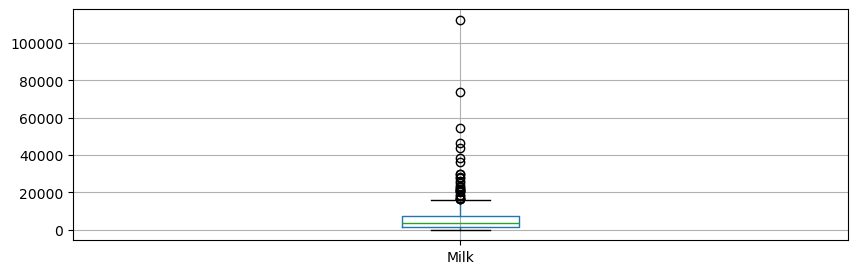

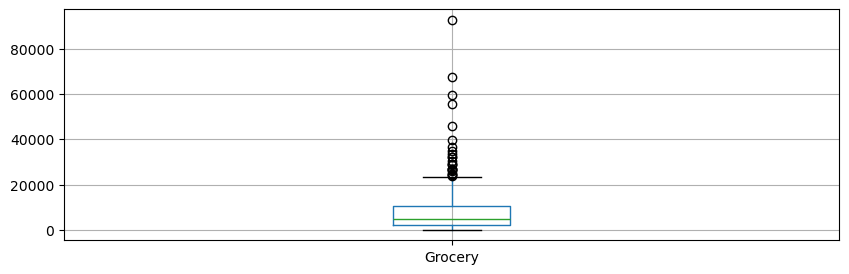

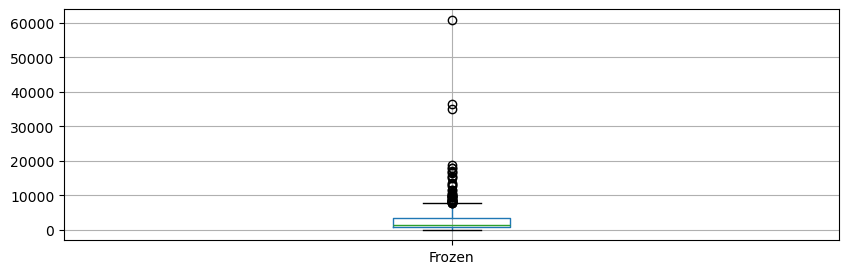

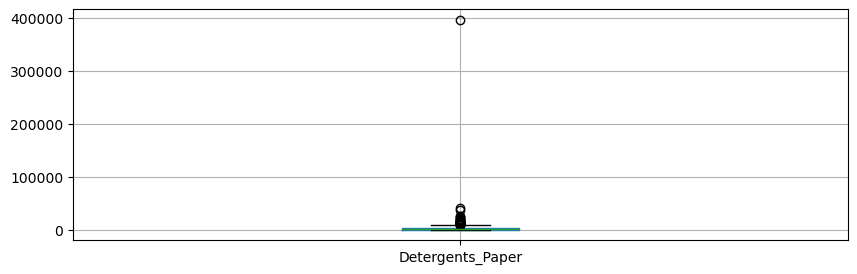

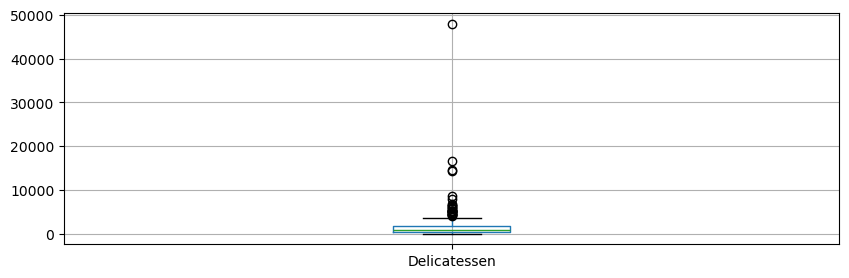

In [25]:
for i in ["Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicatessen"]:
    plt.figure(figsize=(10,3))
    df.boxplot(column=i)
    plt.show()

In [26]:
def remove_outlier(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    iqr = q3-q1
    lower_range = q1-(1.5 * iqr)
    upper_range = q3+(1.5 * iqr)
    return lower_range, upper_range

In [27]:
lmilk,umilk = remove_outlier(df["Milk"])
df["Milk"]=np.where(df["Milk"]>umilk,umilk,df["Milk"])
df["Milk"]=np.where(df["Milk"]<lmilk,lmilk,df["Milk"])

lgroc,ugroc = remove_outlier(df["Grocery"])
df["Grocery"]=np.where(df["Grocery"]>ugroc,ugroc,df["Grocery"])
df["Grocery"]=np.where(df["Grocery"]<lgroc,lgroc,df["Grocery"])

lfrozen,ufrozen = remove_outlier(df["Frozen"])
df["Frozen"]=np.where(df["Frozen"]>ufrozen,ufrozen,df["Frozen"])
df["Frozen"]=np.where(df["Frozen"]<lfrozen,lfrozen,df["Frozen"])

ldet_paper,udet_paper = remove_outlier(df["Detergents_Paper"])
df["Detergents_Paper"]=np.where(df["Detergents_Paper"]>udet_paper,udet_paper,df["Detergents_Paper"])
df["Detergents_Paper"]=np.where(df["Detergents_Paper"]<ldet_paper,ldet_paper,df["Detergents_Paper"])

ldeli,udeli = remove_outlier(df["Delicatessen"])
df["Delicatessen"]=np.where(df["Delicatessen"]>udeli,udeli,df["Delicatessen"])
df["Delicatessen"]=np.where(df["Delicatessen"]<ldeli,ldeli,df["Delicatessen"])

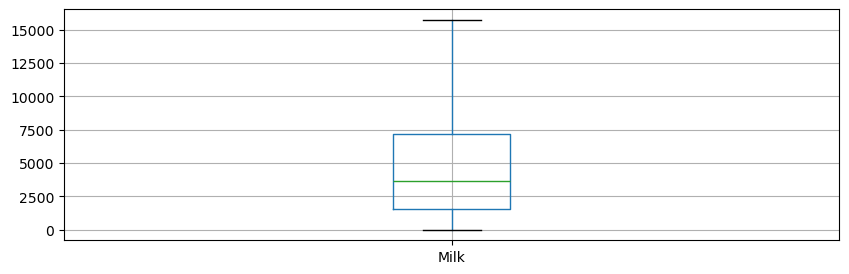

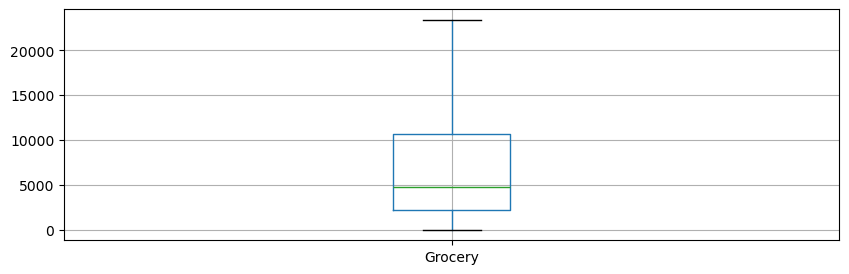

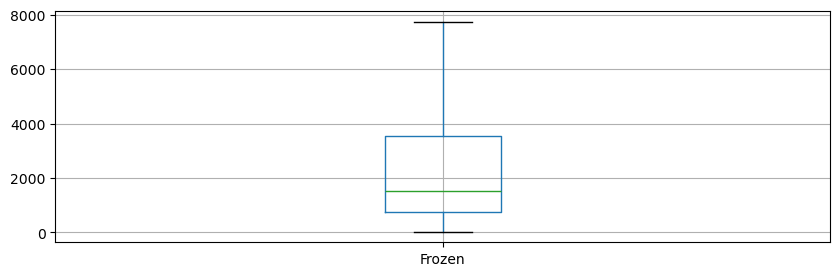

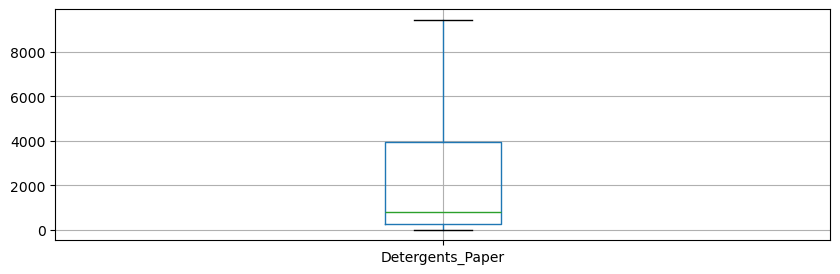

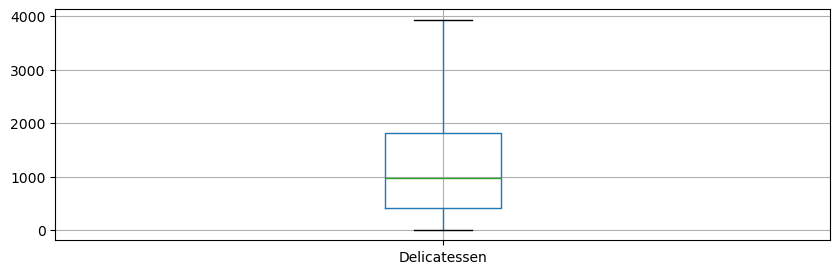

In [28]:
for i in ["Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicatessen"]:
    plt.figure(figsize=(10,3))
    df.boxplot(column=i)
    plt.show()

# 1.Spending Analysis

## What is the total number of buyers in the dataset?

In [29]:
# Total number of buyers
total_buyers = df['Buyer/Spender'].nunique()
print("Total number of buyers:", total_buyers)

Total number of buyers: 440


## What is the average spending on each category (Fresh, Milk, Grocery, Frozen, Detergents_paper, Delicatessen)?

In [30]:
# Average spending on each category
average_spending = df[['Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].mean()
print("Average spending on each category:")
print(average_spending)

Average spending on each category:
Milk                5073.405966
Grocery             7236.375000
Frozen              2507.434659
Detergents_Paper    2401.172443
Delicatessen        1270.034091
dtype: float64


## Which category has the highest average spending?

In [31]:
highest_avg_spending_category = average_spending.idxmax()
highest_avg_spending_value = average_spending.max()
print("Category with the highest average spending:", highest_avg_spending_category)
print("Highest average spending value:", highest_avg_spending_value)

Category with the highest average spending: Grocery
Highest average spending value: 7236.375


In [32]:
# Converting columns to numeric, coercing errors to NaN
cols_to_convert = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')


In [33]:
print(df[cols_to_convert].isnull().sum())

Fresh               2
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64


In [34]:
df[cols_to_convert] = df[cols_to_convert].fillna(df[cols_to_convert].median())

In [35]:
print(df[cols_to_convert].isnull().sum())

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64


In [36]:
df.dtypes

Buyer/Spender         int64
Channel              object
Region               object
Fresh               float64
Milk                float64
Grocery             float64
Frozen              float64
Detergents_Paper    float64
Delicatessen        float64
dtype: object

## How many buyers spend above the average on Fresh Vegetables?

In [37]:
average_spending = df["Fresh"].mean()
buyers_above_avg_fresh = df[df['Fresh'] > average_spending]['Buyer/Spender'].nunique()
print(buyers_above_avg_fresh)

158


# 2.Regional Demand

## What is the total spending in each region?

In [38]:
# Total spending in each region
total_spending_per_region = df.groupby('Region')[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].sum().sum(axis=1)
print("Total spending in each region:")
print(total_spending_per_region)


Total spending in each region:
Region
Lisbon    2189986.75
Oporto    1299915.50
Other     9925023.50
dtype: float64


## Which region has the highest spending on Milk?

In [39]:
# Region with the highest spending on Milk
highest_spending_on_milk_region = df.groupby('Region')['Milk'].sum().idxmax()
print("Region with the highest spending on Milk:", highest_spending_on_milk_region)


Region with the highest spending on Milk: Other


## How does the average spending on Grocery vary across different regions?

In [40]:
# Average spending on Grocery across different regions
average_grocery_spending_per_region = df.groupby('Region')['Grocery'].mean()
print("Average spending on Grocery across different regions:")
print(average_grocery_spending_per_region)

Average spending on Grocery across different regions:
Region
Lisbon    6717.433333
Oporto    8601.130814
Other     7174.996506
Name: Grocery, dtype: float64


## Which region has the highest average spending per buyer?

In [41]:
# Average spending per buyer in each region
average_spending_per_buyer_per_region = df.groupby('Region')[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].mean().mean(axis=1)

# Region with the highest average spending per buyer
highest_avg_spending_region = average_spending_per_buyer_per_region.idxmax()
print("Region with the highest average spending per buyer:", highest_avg_spending_region)

Region with the highest average spending per buyer: Other


In [42]:
# Percentage of buyers spending more on Frozen food compared to Delicatessen
buyers_more_frozen_than_deli = df[df['Frozen'] > df['Delicatessen']].shape[0]
total_buyers = df.shape[0]
percentage_more_frozen_than_deli = (buyers_more_frozen_than_deli / total_buyers) * 100
print("Percentage of buyers spending more on Frozen food compared to Delicatessen:", percentage_more_frozen_than_deli)

Percentage of buyers spending more on Frozen food compared to Delicatessen: 66.13636363636364


In [43]:
# Category with the most variation in spending among buyers (using standard deviation as a measure of variation)
variation_in_spending = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].std()
most_variation_category = variation_in_spending.idxmax()
print("Category with the most variation in spending among buyers:", most_variation_category)

Category with the most variation in spending among buyers: Fresh


In [44]:
# Average spending on Detergents_paper across different regions
average_detergents_paper_spending_per_region = df.groupby('Region')['Detergents_Paper'].mean()
print("Average spending on Detergents_paper across different regions:")
print(average_detergents_paper_spending_per_region)


Average spending on Detergents_paper across different regions:
Region
Lisbon    2249.223333
Oporto    3021.575581
Other     2353.715450
Name: Detergents_Paper, dtype: float64


In [45]:
# Correlation between spending on Fresh and Frozen food
correlation_fresh_frozen = df[['Fresh', 'Frozen']].corr().iloc[0, 1]
print("Correlation between spending on Fresh and Frozen food:", correlation_fresh_frozen)

Correlation between spending on Fresh and Frozen food: 0.374808800131788


In [46]:
# Calculate total spending per buyer across all categories
df['Total_Spending'] = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].sum(axis=1)

# Calculate quantiles to define spending segments
low_threshold = df['Total_Spending'].quantile(0.33)
high_threshold = df['Total_Spending'].quantile(0.67)

# Assign segments based on spending thresholds
df['Spending_Segment'] = pd.cut(df['Total_Spending'],
                                bins=[-float('inf'), low_threshold, high_threshold, float('inf')],
                                labels=['Low Spender', 'Medium Spender', 'High Spender'])

# Display the count of buyers in each segment
segment_counts = df['Spending_Segment'].value_counts()
print("Buyer segments based on spending patterns:")
print(segment_counts)

# Display the first few rows to verify the segmentation
print(df[['Buyer/Spender', 'Total_Spending', 'Spending_Segment']].head())

Buyer segments based on spending patterns:
Spending_Segment
Medium Spender    150
Low Spender       145
High Spender      145
Name: count, dtype: int64
   Buyer/Spender  Total_Spending Spending_Segment
0              1         34112.0   Medium Spender
1              2         33266.0   Medium Spender
2              3         34850.0     High Spender
3              4         27381.0   Medium Spender
4              5         44848.0     High Spender


In [57]:

# Calculate the 90th percentile for each category
top_10_percent_thresholds = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].quantile(0.9)

# Filter data to include only the top 10% spenders in each category
top_10_percent_spenders = {
    category: df[df[category] > threshold]
    for category, threshold in top_10_percent_thresholds.items()
}

# Print the characteristics of the top 10% spenders in each category
for category, spenders in top_10_percent_spenders.items():
    print(f"\nCharacteristics of the top 10% spenders in {category}:")
    print(spenders.describe())



Characteristics of the top 10% spenders in Fresh:
       Buyer/Spender          Fresh          Milk       Grocery       Frozen  \
count      44.000000      44.000000     44.000000     44.000000    44.000000   
mean      211.568182   40693.909091   5782.437500   7237.403409  4448.948864   
std       131.158416   15627.339389   5031.556791   6089.871474  2768.110388   
min        13.000000   27167.000000    286.000000    471.000000   287.000000   
25%       100.000000   30562.750000   2054.250000   2493.250000  1726.250000   
50%       218.500000   36832.000000   3954.500000   5428.500000  4494.500000   
75%       295.500000   43565.250000   7265.500000   8578.250000  7743.750000   
max       437.000000  112151.000000  15755.875000  23409.875000  7743.750000   

       Detergents_Paper  Delicatessen  Total_Spending  
count         44.000000     44.000000       44.000000  
mean        1340.278409   1925.818182    61428.795455  
std         2122.345475   1228.018318    22997.198723  
min 

In [48]:
# Calculate average spending per buyer
average_spending_per_buyer = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].mean(axis=1)

# Identify high spenders (e.g., top 25%) and low spenders (e.g., bottom 25%)
threshold_high = average_spending_per_buyer.quantile(0.75)
threshold_low = average_spending_per_buyer.quantile(0.25)

# Categorize buyers as high or low spenders
df['Spending Level'] = pd.cut(average_spending_per_buyer, bins=[0, threshold_low, threshold_high, float('inf')], labels=['Low', 'Medium', 'High'])

# Calculate average spending for high and low spenders
average_spending_high = df[df['Spending Level'] == 'High'][['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].mean()
average_spending_low = df[df['Spending Level'] == 'Low'][['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].mean()

# Print average spending for high and low spenders
print("Average spending for high spenders:")
print(average_spending_high)
print("\nAverage spending for low spenders:")
print(average_spending_low)


Average spending for high spenders:
Fresh               22881.000000
Milk                 9310.409091
Grocery             13721.145455
Frozen               3324.963636
Detergents_Paper     4522.539773
Delicatessen         1976.481818
dtype: float64

Average spending for low spenders:
Fresh               4438.118182
Milk                1900.972727
Grocery             2456.763636
Frozen              1567.252273
Detergents_Paper     576.890909
Delicatessen         707.554545
dtype: float64


In [49]:
# Calculate correlation between spending on Milk and Grocery
correlation_milk_grocery = df['Milk'].corr(df['Grocery'])
print("Correlation between spending on Milk and Grocery:", correlation_milk_grocery)


Correlation between spending on Milk and Grocery: 0.7737423597168179


In [50]:
# Calculate correlation between spending on Delicatessen and Frozen food
correlation_delicatessen_frozen = df['Delicatessen'].corr(df['Frozen'])
print("Correlation between spending on Delicatessen and Frozen food:", correlation_delicatessen_frozen)


Correlation between spending on Delicatessen and Frozen food: 0.23487486679911238


In [51]:
# Calculate combined average spending on Fresh and Milk for each region
combined_avg_spending = df.groupby('Region')[['Fresh', 'Milk']].mean()
print("Combined average spending on Fresh and Milk for each region:")
print(combined_avg_spending)

Combined average spending on Fresh and Milk for each region:
               Fresh         Milk
Region                           
Lisbon  11273.440000  4985.700000
Oporto  10054.488372  5058.642442
Other   12429.096273  5095.805901


In [52]:
avg_spending_fresh_per_region = df.groupby('Region')['Fresh'].mean()
fastest_growing_region = avg_spending_fresh_per_region.idxmax()

print("Region with the fastest growing spending on Fresh Vegetables:", fastest_growing_region)

Region with the fastest growing spending on Fresh Vegetables: Other


In [53]:
# Calculate average spending per buyer in each category
average_spending_per_buyer = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].mean(axis=1)

# Identify buyers who spend above average in at least three categories
above_avg_in_three = df[(df['Fresh'] > average_spending_per_buyer) &
                        (df['Milk'] > average_spending_per_buyer) &
                        (df['Grocery'] > average_spending_per_buyer) &
                        (df['Frozen'] > average_spending_per_buyer) &
                        (df['Detergents_Paper'] > average_spending_per_buyer) &
                        (df['Delicatessen'] > average_spending_per_buyer)]

# Calculate repeat purchase rate (assuming each row represents a buyer)
repeat_purchase_rate = len(above_avg_in_three) / len(df) * 100
print("Repeat purchase rate for buyers who spend above average in at least three categories:", repeat_purchase_rate, "%")


Repeat purchase rate for buyers who spend above average in at least three categories: 0.0 %


In [54]:
# Calculate standard deviation across categories to identify consistent spenders
std_deviation = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].std(axis=1)

# Define threshold for consistent spending (e.g., standard deviation less than a certain value)
consistent_spenders = df[std_deviation < 100]  # Adjust the threshold as per your dataset characteristics

# Count the number of consistent spenders
num_consistent_spenders = len(consistent_spenders)
print("Number of buyers who spend consistently across all categories:", num_consistent_spenders)


Number of buyers who spend consistently across all categories: 0


In [55]:
# Calculate variance in spending across categories for each region
variance_per_region = df.groupby('Region')[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].var()

# Calculate mean variance across categories for each region
mean_variance_per_region = variance_per_region.mean(axis=1)

# Identify region with the highest mean variance (most diverse spending patterns)
most_diverse_region = mean_variance_per_region.idxmax()
print("Region with the most diverse spending patterns:", most_diverse_region)


Region with the most diverse spending patterns: Other
